## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### Datasets: https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax

#### Análisis Exploratorio de los datos

#### 1) Importo Datasets

In [3]:
ds2019 = pd.read_csv('dataset/historico-2019.csv', parse_dates=True)

In [4]:
ds2018 = pd.read_csv('dataset/molinetes-subte-18.csv', parse_dates=True)

In [5]:
ds2017 = pd.read_csv('dataset/molinetes_2017.csv',  encoding='latin-1', parse_dates=True)

#### Preview

In [6]:
ds2017.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
0,1,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
1,2,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_N_TURN02,6,9 DE JULIO,1,0,0,1
2,3,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,1,0,0,1
3,4,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
4,5,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,2,0,0,2


In [7]:
ds2017.dtypes

V1                  int64
FECHA              object
DESDE              object
HASTA              object
LINEA              object
MOLINETE           object
ID_ESTACION         int64
ESTACION           object
PAX_PAGOS           int64
PAX_PASES_PAGOS     int64
PAX_FREQ            int64
TOTAL               int64
dtype: object

In [8]:
ds2018.head()

,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
0,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_CBarros_S_Turn01,Castro Barros,1.0,0.0,0.0,1.0,201801
1,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_S_Turn03,Lima,4.0,0.0,0.0,4.0,201801
2,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,0.0,0.0,1.0,201801
3,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Peru_S_Turn01,Peru,4.0,0.0,0.0,4.0,201801
4,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_PJunta_S_Turn02,Primera Junta,2.0,0.0,0.0,2.0,201801


In [9]:
ds2018.dtypes

fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
periodo              int64
dtype: object

In [10]:
ds2019.head()

,periodo,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total
0,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_N_Turn02,Lima,1.0,0.0,0.0,1.0
1,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Loria_N_Turn03,Loria,3.0,0.0,0.0,3.0
2,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_Q_HALL_Turn01,Plaza Miserere,3.0,0.0,0.0,3.0
3,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn01,Plaza Miserere,6.0,0.0,0.0,6.0
4,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn03,Plaza Miserere,10.0,0.0,0.0,10.0


In [11]:
ds2019.dtypes

periodo              int64
fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
dtype: object

#### Convierto fechas a datetime

In [12]:
ds2017['FECHA'] = ds2017['FECHA'].astype('datetime64')
ds2018['fecha'] = ds2018['fecha'].astype('datetime64')
ds2019['fecha'] = ds2019['fecha'].astype('datetime64')

#### Agrupo pasajeros por día

In [13]:
grouped_2017 = ds2017.groupby('FECHA').sum()
grouped_2017.head()

,V1,ID_ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
FECHA,,,,,,
2017-01-01,116346875897,885011,83066,24,3712,86802
2017-01-02,198773020743,1504729,814825,527,27545,842897
2017-01-03,201804728922,1509303,993900,618,29107,1023625
2017-01-04,186327717365,1419927,493747,569,18558,512874
2017-01-05,143368810355,1057281,197276,307,7127,204710


In [14]:
grouped_2018 = ds2018.groupby('fecha').sum()
grouped_2018.head()

,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
fecha,,,,,
2018-01-01,104473.0,66.0,3944.0,108483.0,4163356431
2018-01-02,871239.0,1165.0,26505.0,898909.0,7100973588
2018-01-03,939971.0,1191.0,28952.0,970114.0,7183913799
2018-01-04,900927.0,1101.0,27482.0,929510.0,7021867596
2018-01-05,923053.0,1079.0,26494.0,950626.0,7236583860


In [15]:
grouped_2019 = ds2019.groupby('fecha').sum()
grouped_2019.head()

,periodo,pax_pagos,pax_pases_pagos,pax_franq,total
fecha,,,,,
2019-01-01,4239921000,98685.0,81.0,3407.0,102173.0
2019-01-02,7423294067,811786.0,1087.0,23929.0,836802.0
2019-01-03,7586631976,964559.0,1240.0,30610.0,996409.0
2019-01-04,7594102313,964616.0,1184.0,30249.0,996049.0
2019-01-05,6477185981,383196.0,223.0,13228.0,396647.0


#### Me quedo con cantidad total de pasajeros en cada dataset

In [16]:
ts_2017 = grouped_2017[['TOTAL']]
ts_2017 = ts_2017.rename(columns = {'TOTAL':'total'})
ts_2018 = grouped_2018[['total']]
ts_2019 = grouped_2019[['total']]

#### Consolido datasets

In [17]:
molinetes = pd.concat([ts_2017, ts_2018, ts_2019])

In [18]:
molinetes.head()

,total
2017-01-01,86802.0
2017-01-02,842897.0
2017-01-03,1023625.0
2017-01-04,512874.0
2017-01-05,204710.0


In [19]:
molinetes.tail()

,total
2019-12-27,1080310.0
2019-12-28,408094.0
2019-12-29,213081.0
2019-12-30,865096.0
2019-12-31,307615.0


In [20]:
molinetes.shape

(1092, 1)

In [21]:
#Exporto el dataset final
molinetes.to_csv('dataset/molinetes_consolidado.csv', index= True, index_label='fecha')

#### Gráficos de la serie

#### Consolidado 3 años - 2017 a 2019

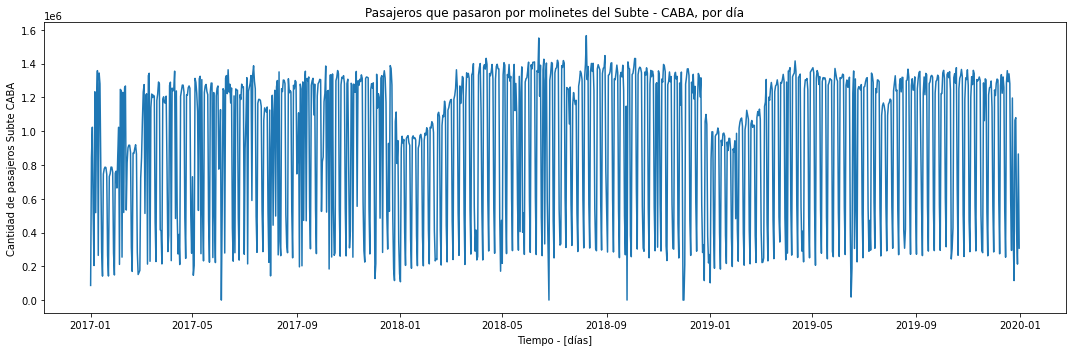

In [22]:
plt.figure(figsize=(15,5))
plt.plot(molinetes)
plt.title('Pasajeros que pasaron por molinetes del Subte - CABA, por día')
plt.ylabel('Cantidad de pasajeros Subte CABA')
plt.xlabel('Tiempo - [días]')
plt.xticks()
plt.tight_layout()


#### Descripción: En la serie temporal se muestra un patrón que se repite anualmente, y oscila entre aproximadamente 200.000 y 1,3 millones de ingresos diarios registrados en estaciones del subte. En Enero se observa la menor cantidad máxima de pasajeros, que corresponde a vacaciones de verano. A partir de allí los máximos comienzan a crecer hasta que alrededor del mes de Abril, donde esos máximos se estabilizan y se mantienen aproximadamente constantes hasta Diciembre que es donde comienzan a decrecer nuevamente. Se observa una caída breve en los máximos que ocurre alrededor del mes de Julio, que posiblemente corresponda al período de receso escolar de invierno. 

#### Oservo el mes de Abril de 2018

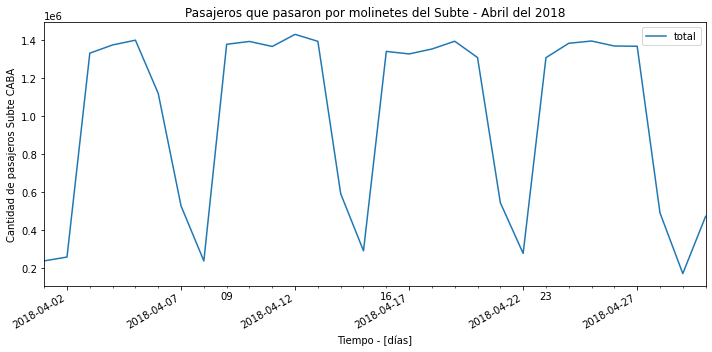

In [23]:

ax = molinetes['2018-04-01':'2018-04-30'].plot(figsize=(10,5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Pasajeros que pasaron por molinetes del Subte - Abril del 2018')
plt.ylabel('Cantidad de pasajeros Subte CABA')
plt.xlabel('Tiempo - [días]')
plt.gcf().autofmt_xdate()
plt.tight_layout()


#### Mirando de cerca un mes cualquiera (en este caso Abril del 2018) se observa también un patrón que se repite semanalmente. Se observan máximos de alrededor de 1.4 millones de Lunes a Viernes, decayendo a aprox 500,000 pasajeros los sábados y un mínimo de alrededor de 200,000 para los domingos. La primera semana de Abril muestra un ciclo más angosto ya que el Lunes 02 de Abril fue feriado en 2018.

#### Histograma

Text(0.5, 1.0, 'Histograma - 20 bins')

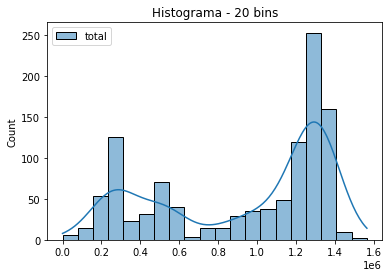

In [24]:
sns.histplot(molinetes, bins=20, kde=True)
plt.title('Histograma - 20 bins')

#### No se aprecia una distribución de datos conocida